<a href="https://colab.research.google.com/github/jassem-1/bone-fracture-detection/blob/main/segmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing Image 1...
Original Image:


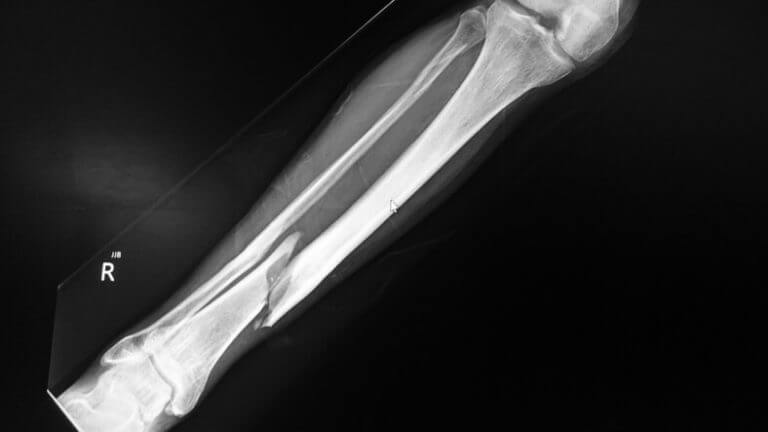

Binary Image After Thresholding:


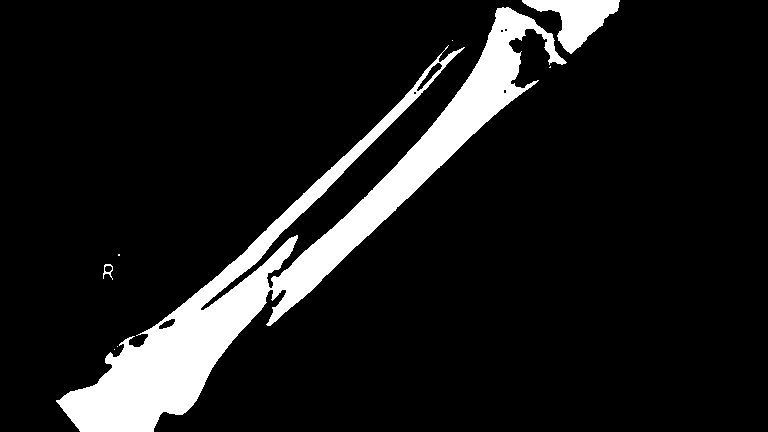

Cleaned Binary Image (Largest White Areas Retained):


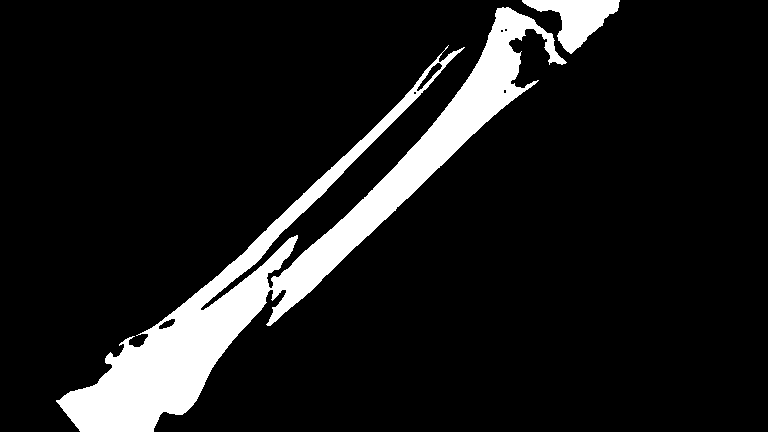

Edge Detection:


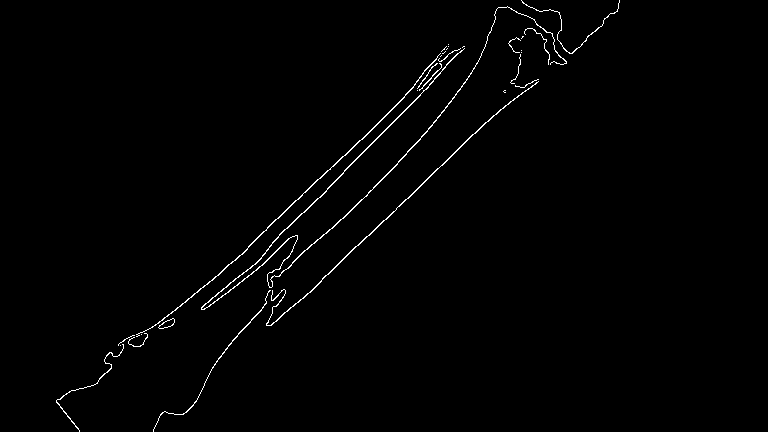

Segmented Image:


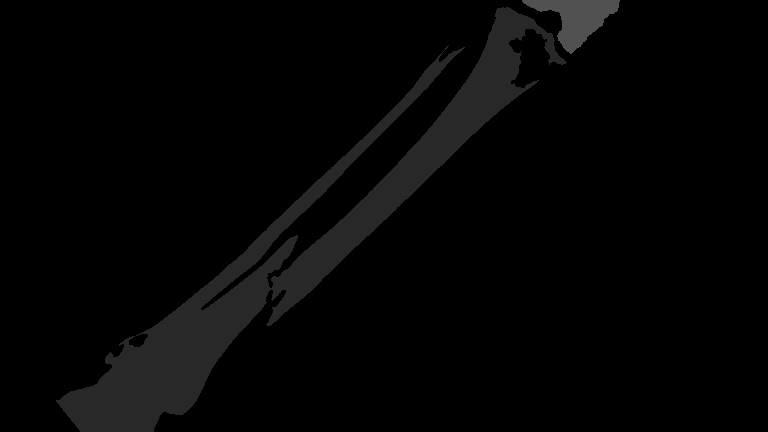

Processing Image 2...
Original Image:


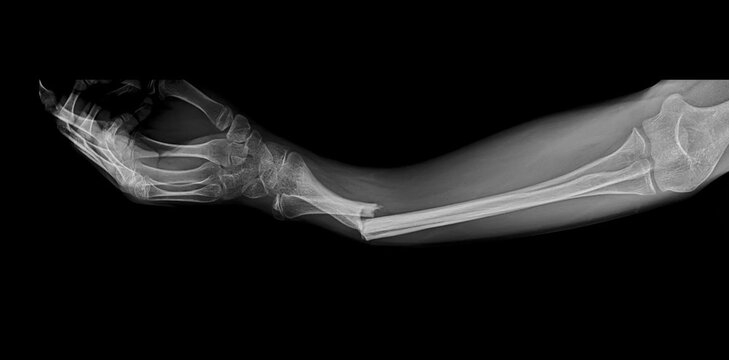

Binary Image After Thresholding:


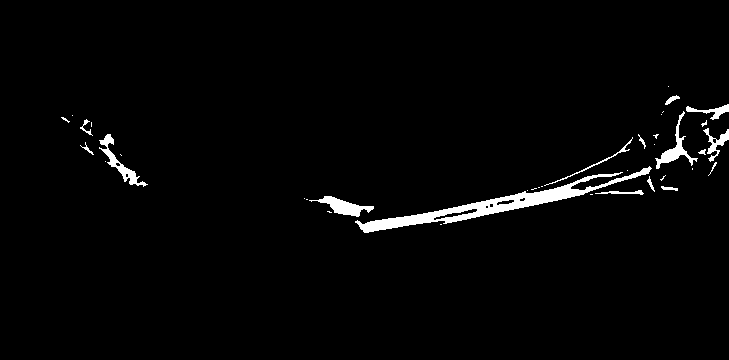

Cleaned Binary Image (Largest White Areas Retained):


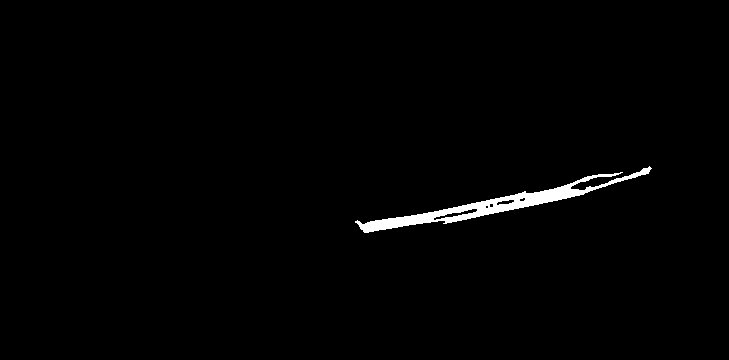

Edge Detection:


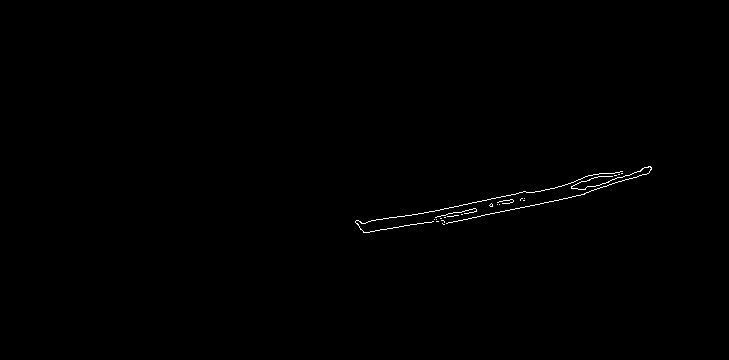

Segmented Image:


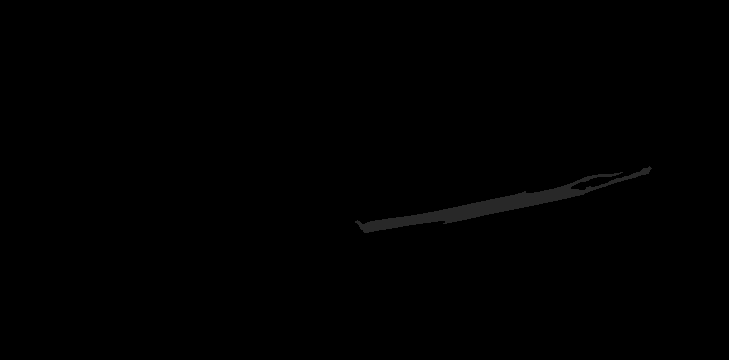

Processing Image 3...
Original Image:


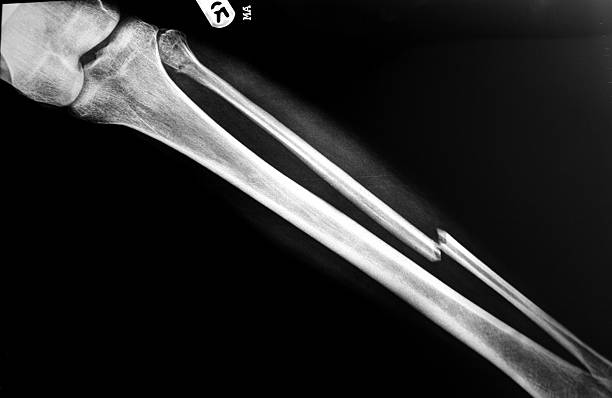

Binary Image After Thresholding:


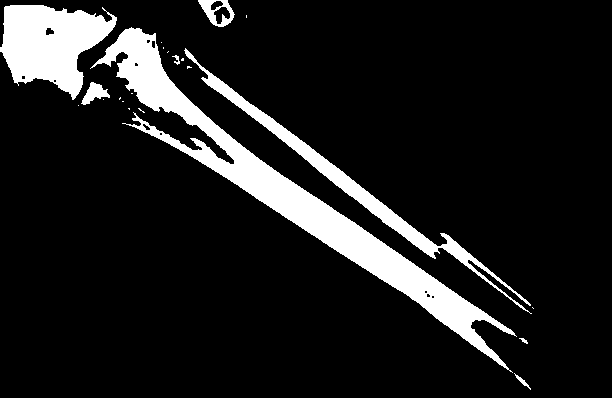

Cleaned Binary Image (Largest White Areas Retained):


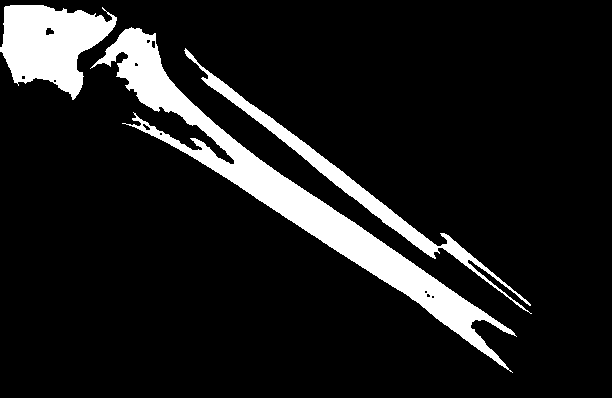

Edge Detection:


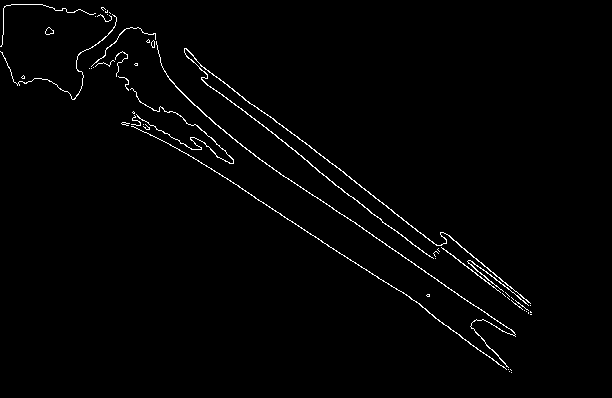

Segmented Image:


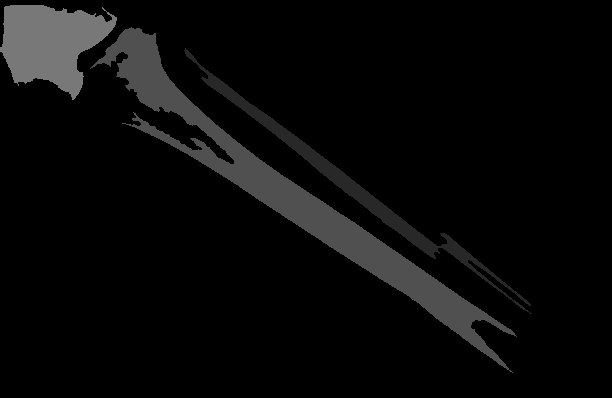

Processing Image 4...
Original Image:


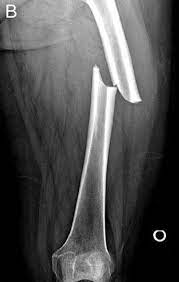

Binary Image After Thresholding:


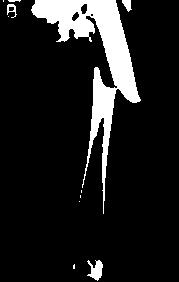

Cleaned Binary Image (Largest White Areas Retained):


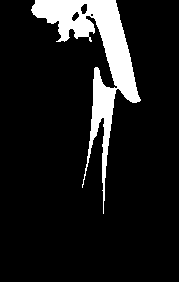

Edge Detection:


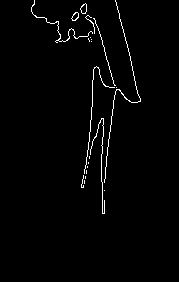

Segmented Image:


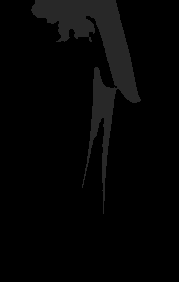

Processing Image 5...
Original Image:


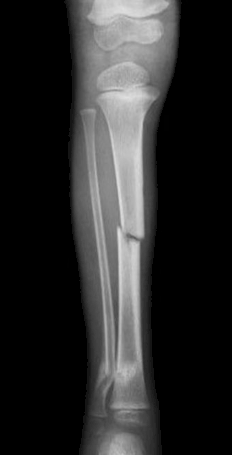

Binary Image After Thresholding:


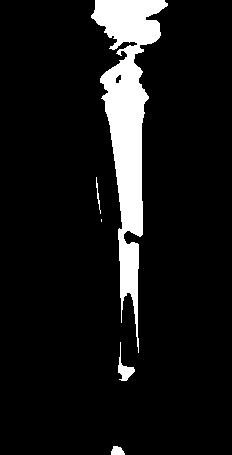

Cleaned Binary Image (Largest White Areas Retained):


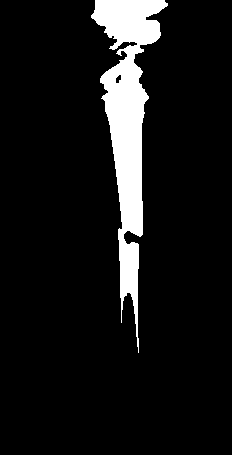

Edge Detection:


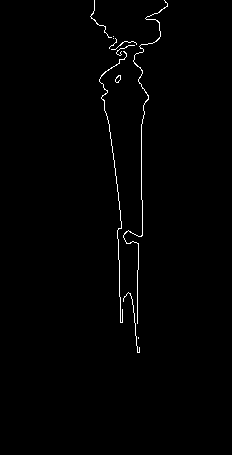

Segmented Image:


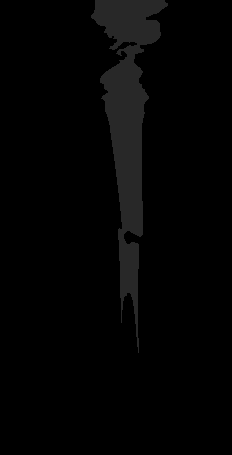

Processing Image 6...
Original Image:


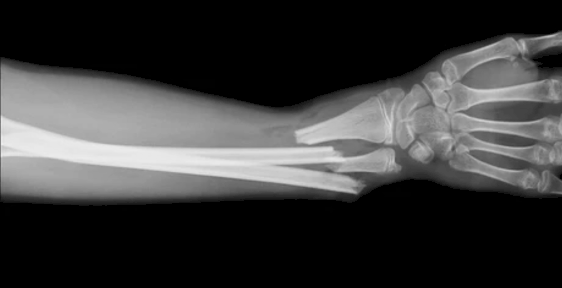

Binary Image After Thresholding:


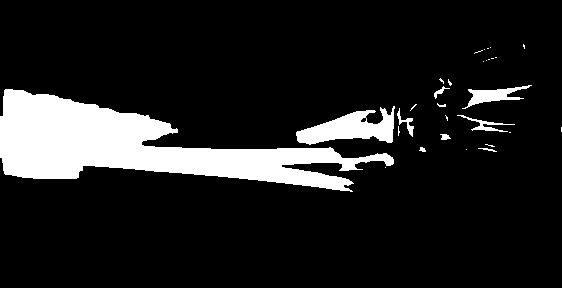

Cleaned Binary Image (Largest White Areas Retained):


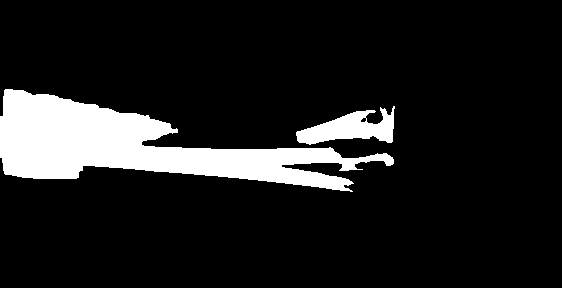

Edge Detection:


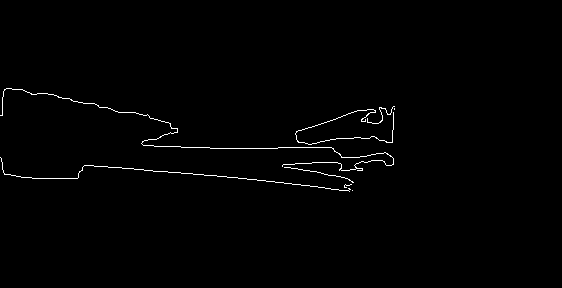

Segmented Image:


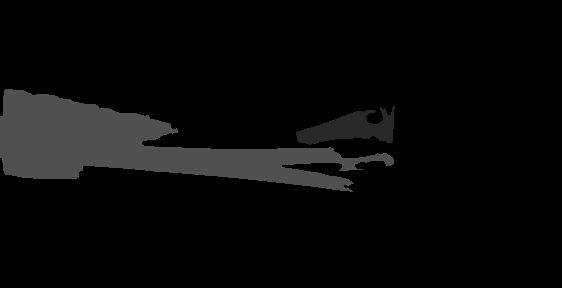

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Step 1: Load the X-ray image
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to load the image from {image_path}. Check the file path.")
    return image

# Step 2: Simple Preprocessing using Gaussian Blur and fixed thresholding
def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY)

    # Erosion to reduce noise while preserving main structures
    kernel = np.ones((2, 2), np.uint8)
    eroded = cv2.erode(binary, kernel, iterations=1)

    return eroded

# Step 3: Detect edges using Canny Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

def retain_largest_white_areas(binary_image):
    # Find connected components in the binary image
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Stats: [x, y, width, height, area] for each component
    # Sort components by area, excluding the background (label 0)
    sorted_stats = sorted(
        [(i, stats[i, cv2.CC_STAT_AREA]) for i in range(1, num_labels)],
        key=lambda x: x[1],
        reverse=True
    )

    # Define a blank mask for the output
    filtered_mask = np.zeros_like(binary_image)

    # Retain only components that meet a certain size threshold or are among the largest
    area_threshold = 700  # Adjust based on the expected size of meaningful areas
    for i, area in sorted_stats:
        if area > area_threshold:
            filtered_mask[labels == i] = 255  # Retain this component

    return filtered_mask
# Step 4: Detect edges using Canny Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

def segment_image(binary_image):
    # Find contours of the segmented areas
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty image to visualize segmentation
    segmented_image = np.zeros_like(binary_image)

    # Draw each contour with a unique label
    for i, contour in enumerate(contours):
        # Use a unique color for each segment
        color = (i + 1) * 40  # Adjust to differentiate segments
        cv2.drawContours(segmented_image, [contour], -1, color, thickness=cv2.FILLED)

    return segmented_image

# Updated Main Function
def bone_fracture_detection(image_paths):
    for i, image_path in enumerate(image_paths):
        print(f"Processing Image {i+1}...")

        # Load the image
        original_image = load_image(image_path)
        if original_image is None:
            continue

        print("Original Image:")
        cv2_imshow(original_image)

        # Preprocess (apply binary thresholding)
        preprocessed = preprocess_image(original_image)
        print("Binary Image After Thresholding:")
        cv2_imshow(preprocessed)

        # Retain only the largest white areas
        cleaned_binary = retain_largest_white_areas(preprocessed)
        print("Cleaned Binary Image (Largest White Areas Retained):")
        cv2_imshow(cleaned_binary)


        edges = detect_edges(cleaned_binary)
        print("Edge Detection:")
        cv2_imshow(edges)

           # Segment the retained binary image
        segmented = segment_image(cleaned_binary)
        print("Segmented Image:")
        cv2_imshow(segmented)

# Provide a list of image paths to process
image_paths = ['fracture.jpg', 'fracture1.jpg', 'fr.jpg', 'fracture3.jfif','leg2.png','arm3.png']
bone_fracture_detection(image_paths)
